# CONNECTING ROUTES DATASET

## BUSINESS OBJECTIVE
* Maximize profit.
* Minimize churn rate.
* Maximize service quality.

## CONSTRAINTS
* High Competition.
* War and Natural Calamity. 

## DATA DICTIONARY 

| **slno** | **Name of Feature** | **Description**                                                                                                                         | **Type** | **Relevance** |
|:--------:|:-------------------:|:----------------------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | ID                  | Unique OpenFlights   identifier for this airport.                                                                                       | Count  | Irrelevant    |
| 2        | Name                | Name of airport. May or may not contain   the City name.                                                                                | Nominal  | Irrelevant    |
| 3        | City                | Main city served by airport. May be spelled   differently from Name.                                                                    | Nominal  | Irrelevant    |
| 4        | Country             | Country or territory where airport is located. See Countries to   cross-reference to ISO 3166-1 codes.                                  | Nominal  | Relevant      |
| 5        | IATA_FAA            | 3-letter IATA code. Null if not   assigned/unknown.                                                                                     | Nominal  | Irrelevant    |
| 6        | ICAO                | 4-letter ICAO code.                                                                                                                     | Nominal  | Irrelevant    |
| 7        | Latitude            | Decimal degrees, usually to six significant   digits. Negative is South, positive is North.                                             | Ratio    | Irrelevant    |
| 8        | Longitude           | Decimal degrees, usually to six significant   digits. Negative is West, positive is East.                                               | Ratio    | Irrelevant    |
| 9        | Altitude            | In feet.                                                                                                                                | Ratio    | Irrelevant    |
| 10       | Time                | Hours offset from UTC. Fractional hours are   expressed as decimals, eg. India is 5.5.                                                  | Ratio    | Irrelevant    |
| 11       | DST                 | Daylight savings time. One of E (Europe), A (US/Canada), S (South   America), O (Australia), Z (New Zealand), N (None) or U (Unknown).  | Nominal  | Relevant      |
| 12       | Tz database time    | Timezone   in "tz" (Olson) format, eg. "America/Los_Angeles".                                                                           | Nominal  | Irrelevant    |

Importing the required libraries. 

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset using pandas library

In [2]:
df=pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass11\flight_hault.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [3]:
df.nunique()

0     8107
1     7908
2     6977
3      240
4     5878
5     6782
6     7986
7     7987
8     2416
9       38
10       7
11     294
dtype: int64

As there were no column names in the dataset on loading inputing the column names given in the question. 

In [4]:
df.columns=["ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Time","DST","Tz database time"]

Checking the column names.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8107 non-null   int64  
 1   Name              8107 non-null   object 
 2   City              8107 non-null   object 
 3   Country           8107 non-null   object 
 4   IATA_FAA          5880 non-null   object 
 5   ICAO              8043 non-null   object 
 6   Latitude          8107 non-null   float64
 7   Longitude         8107 non-null   float64
 8   Altitude          8107 non-null   int64  
 9   Time              8107 non-null   float64
 10  DST               8107 non-null   object 
 11  Tz database time  8107 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 760.2+ KB


In [6]:
df.head()

,ID,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Time,DST,Tz database time
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


Creating an empty graph object and store the graph obtained from the dataframe in to the empty graph object. 

In [7]:

g=nx.from_pandas_edgelist(df,source='Country',target='DST',create_using=nx.DiGraph())

__GRAPH__

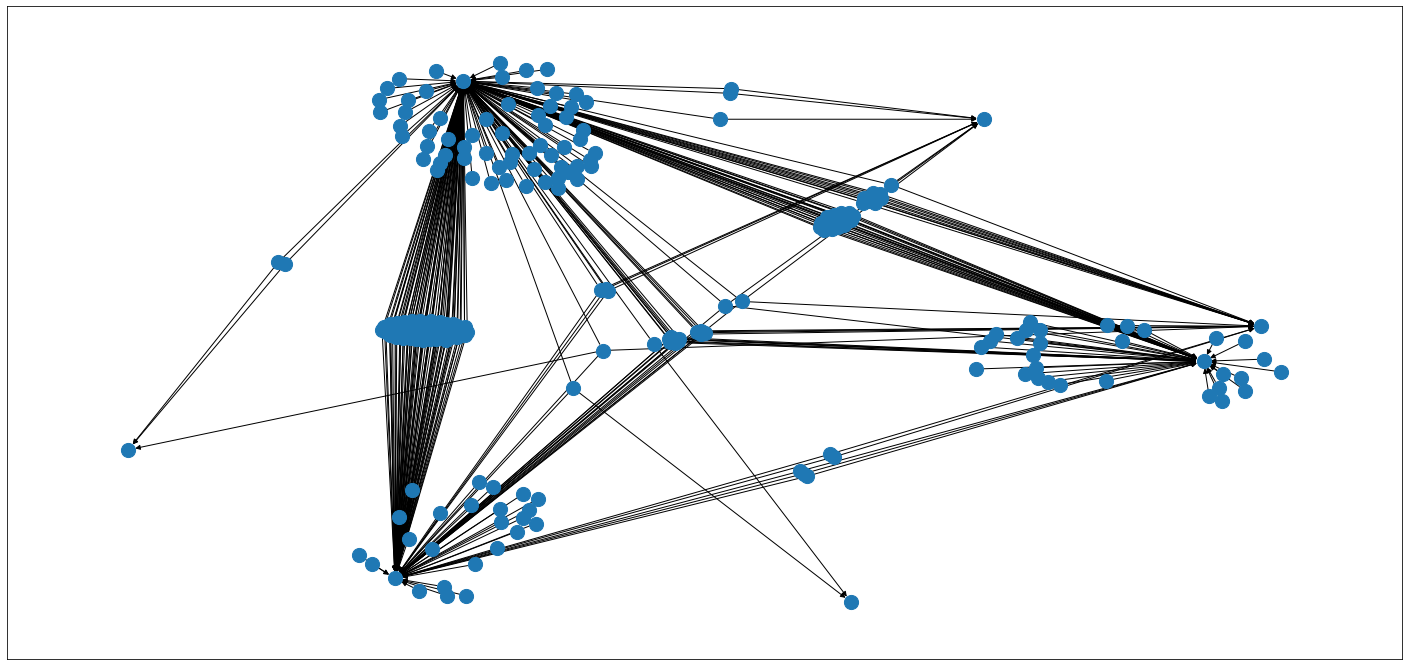

In [8]:
pos = nx.spring_layout(g, k = 0.15)
plt.figure(figsize=(25,12))
nx.draw_networkx(g, pos, node_size = 200,cmap=plt.cm.Blues,with_labels=False)

__Measure of Degree Centrality__

In [9]:
def Degree_Centrality(i):
    dc=nx.degree_centrality(i)
    df = pd.DataFrame.from_dict({
        'node': list(dc.keys()),
        'centrality': list(dc.values())
    })
    return df.sort_values('centrality', ascending=False)

In [10]:
Degree_Centrality(g)

,node,centrality
1,U,0.735772
5,N,0.455285
3,E,0.243902
115,S,0.077236
7,A,0.036585
...,...,...
108,Slovakia,0.004065
109,Turks and Caicos Islands,0.004065
110,Dominican Republic,0.004065
112,Honduras,0.004065


__Measure of Degree of Closeness Centrality__

In [11]:
def Closeness_Centrality(i):
    cc=nx.closeness_centrality(i)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)

In [12]:
Closeness_Centrality(g)


,node,centrality
1,U,0.735772
5,N,0.455285
3,E,0.243902
115,S,0.077236
7,A,0.036585
...,...,...
88,Greece,0.000000
89,France,0.000000
90,Saint Pierre and Miquelon,0.000000
91,Hungary,0.000000


__Measure of Degree of In-Between Centrality__<br>
Betweenness centrality is a measure of centrality in a graph based on shortest paths.

In [13]:
def Betweenness_Centrality(i):
    bc=nx.betweenness_centrality(i)
    df = pd.DataFrame.from_dict({
        'node': list(bc.keys()),
        'centrality': list(bc.values())
    })
    return df.sort_values('centrality', ascending=False)

In [14]:
Betweenness_Centrality(g)

,node,centrality
0,Papua New Guinea,0.0
155,Northern Mariana Islands,0.0
157,Marshall Islands,0.0
158,Midway Islands,0.0
159,Micronesia,0.0
...,...,...
87,Croatia,0.0
88,Greece,0.0
89,France,0.0
90,Saint Pierre and Miquelon,0.0


## CONCLUSION

from this analysis we were able to deduct the busiest networks of flights based on Day light savings of different regions. 